In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('results.csv', sep=';')
df_all.head()

,myproc,p,n,time
0,7,10,1000000,0.883193
1,5,10,1000000,0.894240
2,6,10,1000000,0.913701
3,3,10,1000000,0.916496
4,2,10,1000000,0.894781


## Ускорение и закон Амдаля

In [3]:
for myproc in df_all.myproc.unique():
    for n in df_all.n.unique():
        for p in df_all.p.unique():
            df_all.loc[(df_all.p==p)&(df_all.n==n),'mean_time'] = df_all[(df_all.p==p)&(df_all.n==n)]['time'].mean()

In [59]:
# TODO: should be always named as `df`
df = df_all[df_all.myproc == 0]

In [5]:
for n in df.n.unique():
    for p in df.p.unique():
        p_1_time = (df[(df.n==n)&(df.p==1)]['mean_time']).iloc[0]
        own_time = df[(df.p==p)&(df.n==n)]['mean_time'].iloc[0]
        df.loc[(df.p==p)&(df.n==n),'accel'] = p_1_time/own_time

/Users/a.kozharin/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/a.kozharin/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
df['eff'] = df['accel']/df['p']

/Users/a.kozharin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
def amdal(p, f):
    return 1/(f + (1-f)/p)

In [53]:
def plot_save_graphs(x_label, y_label, fixed='p'):
    
    def _appr_accel(n, p):
        return 6*n/(6*n/p + 6 + np.log2(p))
    
    def _appr_eff(n, p):
        return _appr_accel(n, p)/p
    
    def _appr_amdal(n, p, accels):
        if len(np.array(p).reshape(-1)) == 1:
            p = np.array([p]*len(accels))
        elif len(np.array(accels).reshape(-1)) == 1:
            accels = np.array([accels]*len(p))
        from scipy.optimize import curve_fit
        popt, pcov = curve_fit(amdal, p, accels)
        return amdal(p, popt[0])
    
    def _routine(data, x_label, y_label, fixed_value):
        x_data, y_data = data[x_label], data[y_label]
        result = dict()
        result['real'] = (x_data, y_data)
        p, n = (fixed_value, x_data)
        if x_label == 'p':
            p, n = (n, p)
        # Approximation
        if y_label == 'accel':
            # NOTE: approximation for acceleration
            result['appr_accel'] = (x_data, _appr_accel(n, p))
            if x_label == 'p':
                result['appr_amdal'] = (x_data, _appr_amdal(n, p, y_data))
                #plt.scatter(x_data, _appr_amdal(n, p, y_data), color='green', label='amdal')
        elif y_label == 'eff':
            #plt.scatter(x_data, _appr_eff(n, p), color='red', label='theor')
            result['appr_eff'] = (x_data, _appr_eff(n, p))
        #plt.xlabel(x_label)
        #plt.ylabel(y_label)
        #plt.legend()
        #plt.title(f'{y_label}, {fixed}={fixed_value}')
        #plt.savefig(f'{y_label}_{fixed}_{fixed_value}', dpi=120)
        #plt.show()
        return result
    if fixed == 'n':
        for n in df.n.unique():
            data = df[df.n==n]
            return _routine(data, x_label, y_label, n)
    elif fixed == 'p':
        for p in df.p.unique():
            data = df[df.p==p]
            return _routine(data, x_label, y_label, p)
    else:
        raise ValueError('Not implemented')

In [58]:
#plot_save_graphs('p', 'accel', fixed='n')['appr_eff'][0]
#plot_save_graphs('n', 'accel', fixed='p')
plot_save_graphs('p', 'eff', fixed='n')['appr_eff']
#plot_save_graphs('n', 'eff', fixed='p')

(9       10
 19      11
 32      12
 43      13
 58      14
 72      15
 84      16
 91       1
 92       2
 96       3
 99       4
 104      5
 111      6
 117      7
 125      8
 132      9
 958     10
 971     11
 980     12
 994     13
 1009    14
 1024    15
 1038    16
 1043     1
 1045     2
 1048     3
 1052     4
 1057     5
 1062     6
 1069     7
 1077     8
 1083     9
 1911    10
 1922    11
 1936    12
 1947    13
 1961    14
 1976    15
 1991    16
 1995     1
 1997     2
 1999     3
 2003     4
 2008     5
 2015     6
 2021     7
 2029     8
 2037     9
 Name: p, dtype: int64, 9       0.999984
 19      0.999983
 32      0.999981
 43      0.999979
 58      0.999977
 72      0.999975
 84      0.999973
 91      0.999999
 92      0.999998
 96      0.999996
 99      0.999995
 104     0.999993
 111     0.999991
 117     0.999990
 125     0.999988
 132     0.999986
 958     0.999984
 971     0.999983
 980     0.999981
 994     0.999979
 1009    0.999977
 1024    0.999975
 1038

## Распределение времени работы каждого процесса

In [10]:
for n in df_all.n.unique():
    for p in df_all.p.unique():
        for myproc in df_all.myproc.unique():
            own_time = df_all.loc[(df_all.p == p)&(df_all.n == n)&(df_all.myproc == myproc),'time']
            if len(own_time) == 0:
                continue
            own_time = own_time.iloc[0]
            p0_time = df_all.loc[(df_all.p == p)&(df_all.n == n)&(df_all.myproc == 0),'time'].iloc[0]
            df_all.loc[(df_all.p == p)&(df_all.n == n)&(df_all.myproc == myproc),'delay'] = p0_time - own_time

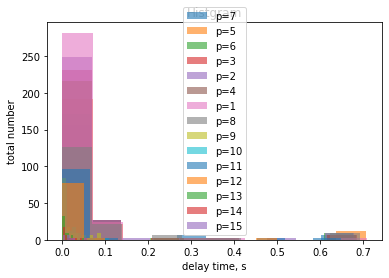

In [15]:
for p in df_all.myproc.unique():
    if p == 0:
        continue
    plt.xlabel('delay time, s')
    plt.ylabel('total number')
    plt.title(f'Histgram')
    plt.hist(df_all[df_all.myproc == p]['delay'], alpha=0.6, label=f'p={p}')
    plt.legend()
plt.savefig('delay_histogram.png', dpi=120)

Время задержки - примерно 0.1 секунда.

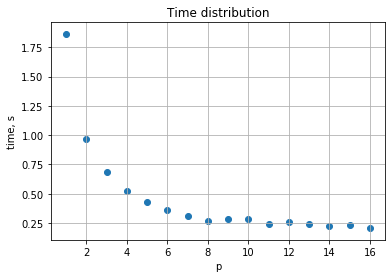

In [12]:
plt.xlabel('p')
plt.ylabel('time, s')
plt.scatter(df_all['p'].unique(), [df_all.loc[df_all.p == p,'time'].mean() for p in df_all.p.unique()])
plt.title('Time distribution')
plt.grid()

## Сравнение для двух способов разбиения

In [13]:
df_circle = pd.read_csv('results_circle.csv', sep=';')
df_parts = pd.read_csv('results.csv', sep=';')

In [14]:
df_circle.head()

,myproc,p,n,time
0,5,10,1000000,0.915967
1,3,10,1000000,0.922183
2,2,10,1000000,0.929037
3,7,10,1000000,0.970425
4,4,10,1000000,0.919532


In [15]:
df_delta = df_circle.copy()
for myproc in df_circle.myproc.unique():
    for p in df_circle.p.unique():
        for n in df_circle.n.unique():
            df_circle_time = df_circle.loc[(df_circle.n == n)&(df_circle.p == p)&(df_circle.myproc == myproc),'time'].mean()
            df_parts_time = df_parts.loc[(df_parts.n == n)&(df_parts.p == p)&(df_parts.myproc == myproc),'time'].mean()
            df_delta.loc[(df_delta.n == n)&(df_delta.p == p)&(df_delta.myproc == myproc),'delta'] = df_circle_time - df_parts_time

In [16]:
print('From circle to parts')
print('time increased: {} times'.format(np.count_nonzero(df_delta.delta >= 0)))
print('time decreased: {} times'.format(np.count_nonzero(df_delta.delta < 0)))

From circle to parts
time increased: 1310 times
time decreased: 594 times


Видим, что время подсчета увеличилось.